In [114]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [115]:
df = pd.read_csv('insurance.csv')

In [116]:
data = pd.get_dummies(data,drop_first=True)
d2 = data.copy()

y_col = 'charges'
X = d2.drop(y_col,axis=1)
y = d2[y_col].copy()
print('X shape:',X.shape)
print('Y shape:',y.shape)

X shape: (1338, 7)
Y shape: (1338,)


In [117]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0,test_size = 0.2)

In [118]:
print(f"X_train: {X_train.shape}\ny_train: {y_train.shape}\nX_test: {X_test.shape}\ny_test: {y_test.shape}")

X_train: (1070, 7)
y_train: (1070,)
X_test: (268, 7)
y_test: (268,)


In [119]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [120]:
Training_Dataset = Training_Dataset.dropna()
X_train = np.array(Training_Dataset.iloc[:, :-1].values) 
y_train = np.array(Training_Dataset.iloc[:, 1].values) 

In [121]:
Testing_Dataset = Testing_Dataset.dropna()
X_test = np.array(Testing_Dataset.iloc[:, :-1].values) 
y_test = np.array(Testing_Dataset.iloc[:, 1].values) 

In [122]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categories='auto')

var1 = onehotencoder.fit_transform(df.region.values.reshape(-1,1)).toarray()
var1 = pd.DataFrame(var1)
var1.columns = ['region_1', 'region_2', 'region_3', 'region_4']
var1 = var1.iloc[:,0:3]
df = pd.concat([df, var1], axis=1)

onehotencoder = OneHotEncoder(categories='auto')
var3 = onehotencoder.fit_transform(df.smoker.values.reshape(-1,1)).toarray()
var3 = pd.DataFrame(var3)
var3.columns = ['smoker_1', 'smoker_2']
var3 = var3.iloc[:,0]
df = pd.concat([df, var3], axis=1)
df = df.drop(columns = ['region','sex','smoker'])

In [123]:
df = df[['age', 'bmi', 'children', 'region_1', 'region_2', 'region_3','smoker_1', 'charges']]
df

,age,bmi,children,region_1,region_2,region_3,smoker_1,charges
0,19,27.900,0,0.0,0.0,0.0,0.0,16884.92400
1,18,33.770,1,0.0,0.0,1.0,1.0,1725.55230
2,28,33.000,3,0.0,0.0,1.0,1.0,4449.46200
3,33,22.705,0,0.0,1.0,0.0,1.0,21984.47061
4,32,28.880,0,0.0,1.0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0.0,1.0,0.0,1.0,10600.54830
1334,18,31.920,0,1.0,0.0,0.0,1.0,2205.98080
1335,18,36.850,0,0.0,0.0,1.0,1.0,1629.83350
1336,21,25.800,0,0.0,0.0,0.0,1.0,2007.94500


In [124]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,0:7]
Y = df.iloc[:,7]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 5)

In [125]:
y_train = np.array(y_train).reshape(-1, 1)
y_train = pd.DataFrame(y_train)
y_test = np.array(y_test).reshape(-1, 1)
y_test = pd.DataFrame(y_test)

In [126]:
print((x_train.shape,x_test.shape,y_train.shape,y_test.shape))

((1003, 7), (335, 7), (1003, 1), (335, 1))


In [127]:
reg = LinearRegression()
reg.fit(x_train, y_train)
lr_pred = reg.predict(x_test)
print(reg.coef_)

[[ 2.60642999e+02  3.29874669e+02  5.92234730e+02  8.45480348e+02
   8.89605021e+02  4.60105170e+00 -2.38553573e+04]]


In [128]:
from sklearn.metrics import mean_squared_error
mean_squared_error(lr_pred,y_test)

34369516.07026162

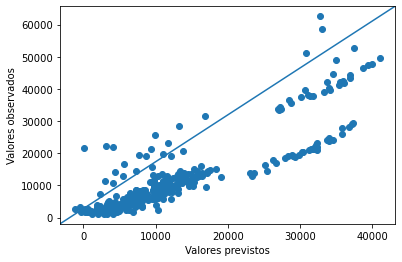

In [129]:
fig, ax = plt.subplots()
ax.plot([0,1],[0,1], transform=ax.transAxes)

plt.scatter(lr_pred, y_test)
plt.xlabel("Valores previstos")
plt.ylabel("Valores observados")

plt.show()

In [130]:
data = pd.get_dummies(df)
X = data.drop("charges",1)
y = data[["charges"]]

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 0)

In [132]:
las_test = Lasso()
las_test.fit(X_train, y_train)
pred = las_test.predict(X_test)

In [133]:
print("La media absoluta es:", mean_absolute_error(y_test, pred))
print("La puntuacion del modelo es:", las_test.score(X_test, y_test))

La media absoluta es: 4011.857210388824
La puntuacion del modelo es: 0.7958977505661932
